# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [25]:
# Take make moons in built dataset

data_ =  datasets.make_circles(100)

In [26]:
# check the dataset

data_ 

(array([[ 7.01045344e-01, -3.85402939e-01],
        [-7.43821189e-01, -2.94499642e-01],
        [ 5.02324156e-02,  7.98421383e-01],
        [-1.87381315e-01,  9.82287251e-01],
        [ 7.93691761e-01,  1.00266587e-01],
        [ 1.87381315e-01, -9.82287251e-01],
        [ 5.83174902e-01,  5.47637685e-01],
        [ 9.92114701e-01, -1.25333234e-01],
        [ 7.01045344e-01,  3.85402939e-01],
        [-5.09939192e-01,  6.16410594e-01],
        [-9.68583161e-01, -2.48689887e-01],
        [-9.68583161e-01,  2.48689887e-01],
        [ 6.27905195e-02, -9.98026728e-01],
        [ 7.28968627e-01, -6.84547106e-01],
        [ 5.09939192e-01, -6.16410594e-01],
        [ 4.25779292e-01,  9.04827052e-01],
        [-6.47213595e-01, -4.70228202e-01],
        [-7.01045344e-01, -3.85402939e-01],
        [-7.74866529e-01, -1.98951910e-01],
        [-5.35826795e-01,  8.44327926e-01],
        [-7.01045344e-01,  3.85402939e-01],
        [-1.87381315e-01, -9.82287251e-01],
        [-5.02324156e-02,  7.984

In [27]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [28]:
inputData.head()

,0,1
0,0.701045,-0.385403
1,-0.743821,-0.294500
2,0.050232,0.798421
3,-0.187381,0.982287
4,0.793692,0.100267


In [29]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,1
2,1
3,0
4,1


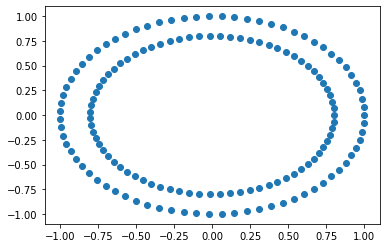

In [23]:
# create a scatter plot for inputData set
plt.scatter(inputData[0], inputData[1])



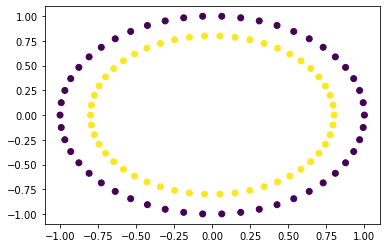

In [30]:
# create a scatter plot for inputData set with outputData color
plt.scatter(inputData[0], inputData[1], c = outputData)


In [33]:
# Call the sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(inputData)

#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
# check for labels
model.labels_


array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int32)

In [35]:
from sklearn import metrics

In [36]:
# call metrics and check silhoutte score
metrics.silhouette_score(inputData, model.labels_)


0.39091576063431177

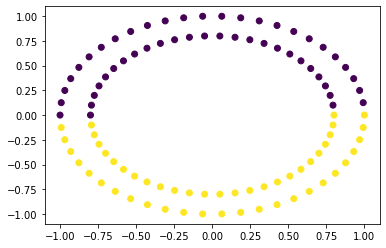

In [38]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0], inputData[1], c = model.labels_)


#### finding right number of cluster

In [ ]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

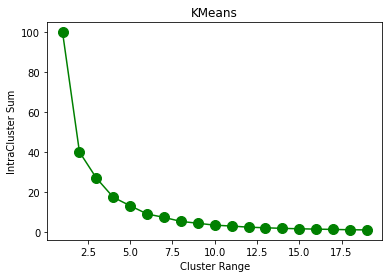

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()